# A quickstart for Mitsuba building blocks

In [1]:
from typing import *
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

import drjit as dr
import mitsuba as mi
mi.set_variant('scalar_rgb')

from util import show_ds
sampler = mi.load_dict({'type': 'independent'})

## 4. Emitter sampling
`mi.Scene.sample_emitter_direction(self, ref, sample, test_visibility=True...)`
* **Parameter** `ref` (`mi.Interaction`)
* **Parameter** `sample` (`mi.Point2f`)
* **Parameter** `test_visibility` (`bool`) (default `True`)
* ...
* **Returns** -> `(mi.DirectionSample, mi.Spectrum)`

In [2]:
scene = mi.load_dict(mi.cornell_box())
ray = mi.Ray3f(0, [dr.sqrt(3)/2, 0.5, 0])
si = scene.ray_intersect(ray)
u = sampler.next_2d()

print("# ---------- Methods usage ----------")
ds, weight = scene.sample_emitter_direction(si, u)
print(f"{type(ds) = }")
print(ds, "\n")
print(f"{type(weight) = }")
print(f"{weight = }", "\n")

# ---------- Methods usage ----------
type(ds) = <class 'mitsuba.scalar_rgb.DirectionSample3f'>
DirectionSample3f[
  p = [-0.180146, 0.99, 0.164645],
  n = [0, -1, -4.37114e-08],
  uv = [0.108379, 0.90696],
  time = 0,
  pdf = 27.7989,
  delta = 0,
  emitter = AreaLight[
    radiance = SRGBReflectanceSpectrum[
      value = [18.387, 13.9873, 6.75357]
    ],
    surface_area = 0.1748,
    <no medium attached!>
  ],
  d = [-0.935878, 0.327239, 0.130566],
  dist = 1.261
] 

type(weight) = <class 'mitsuba.scalar_rgb.Color3f'>
weight = [0.6614301800727844, 0.5031610727310181, 0.24294422566890717] 



In [3]:
print("# ---------- Assertions ----------")
print(f"{dr.allclose(dr.norm(ds.p - si.p), ds.dist) = }")
assert not dr.allclose(si.p- ds.p, ds.dist*ds.d)
print(f"{dr.allclose(ds.p -si.p, ds.dist*ds.d) = }")
print(f"{dr.allclose(ds.pdf, scene.pdf_emitter_direction(si, ds)) = }\n")

print(f"{dr.allclose(weight, scene.eval_emitter_direction(si, ds) / ds.pdf) = }\n")

print(f"{dr.allclose(scene.eval_emitter_direction(si, ds), ds.emitter.eval_direction(si, ds)) = }")

# ---------- Assertions ----------
dr.allclose(dr.norm(ds.p - si.p), ds.dist) = True
dr.allclose(ds.p -si.p, ds.dist*ds.d) = True
dr.allclose(ds.pdf, scene.pdf_emitter_direction(si, ds)) = True

dr.allclose(weight, scene.eval_emitter_direction(si, ds) / ds.pdf) = True

dr.allclose(scene.eval_emitter_direction(si, ds), ds.emitter.eval_direction(si, ds)) = True


In [4]:
print(f"{scene.eval_emitter_direction(si, ds) = }")
print(f"{ds.emitter.eval(si) = }")
print(f"{ds.emitter.eval_direction(si, ds) = }")

scene.eval_emitter_direction(si, ds) = [18.386999130249023, 13.987299919128418, 6.753570079803467]
ds.emitter.eval(si) = [18.386999130249023, 13.987299919128418, 6.753570079803467]
ds.emitter.eval_direction(si, ds) = [18.386999130249023, 13.987299919128418, 6.753570079803467]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3671358].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1690058..1.3702229].


ds_list[0].pdf = 29.106088638305664
ds_list[0].d = [-0.9459948539733887, 0.3222646415233612, 0.03520338609814644]


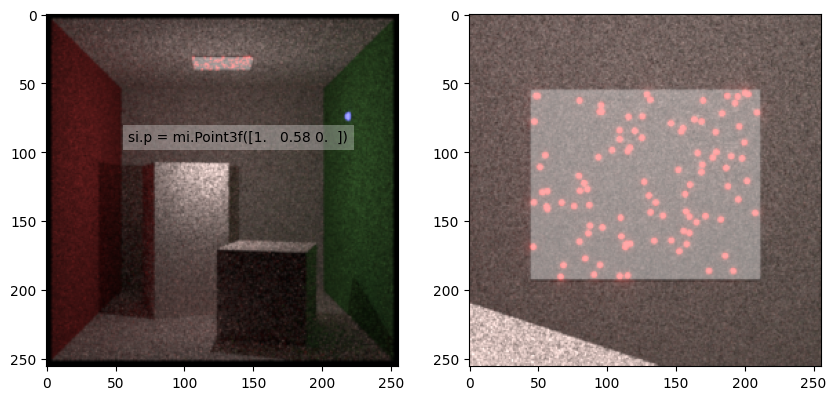

In [5]:
N = 100
ds_list = []
sampler.seed(0)
for i in range(N):
    ds_temp, _ = scene.sample_emitter_direction(si, sampler.next_2d())
    ds_list.append(ds_temp)

plt.figure(figsize=(10,5))
show_ds(si, ds_list)
print(f"{ds_list[0].pdf = }")
print(f"{ds_list[0].d = }")

Current the distribution of resulting position from `scene.sample_emitter_direction` seems not to depend on the argument `si`. However, the **pdf** which is an attribue of `mi.DirectionSample3f` is with respect to **solid angles** viewed from `ref`, so that it depends on `ref`.
Note that another some attributes of the results such as `ds.d` depend.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.359506].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17248301..1.3702222].


ds_list2[0].pdf = 6.012342929840088
ds_list2[0].d = [-0.20854206383228302, 0.9770011901855469, 0.04448496922850609]


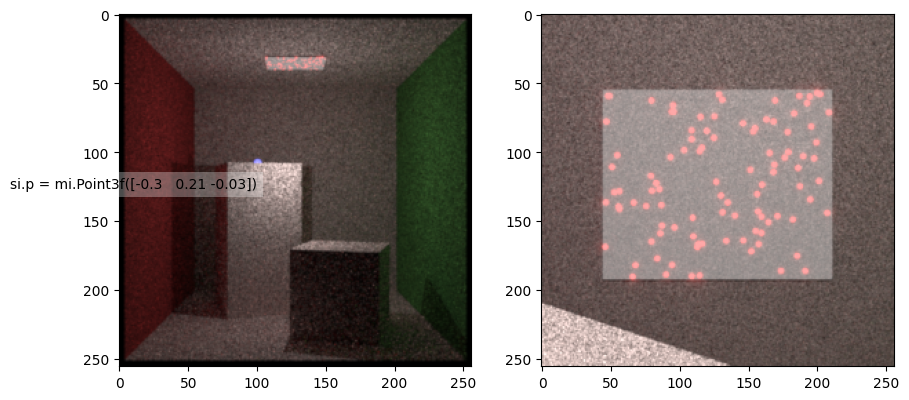

In [6]:
ray2 = mi.Ray3f([-0.3, 0.8, -0.03], [0, -1, 0])
si2 = scene.ray_intersect(ray2)
ds_list2 = []
sampler.seed(0)
for i in range(N):
    # ds_temp, _ = scene.sample_emitter_direction(si2, sampler.next_2d())
    ds_temp, _ = scene.sample_emitter_direction(mi.SurfaceInteraction3f(), sampler.next_2d())
    ds_list2.append(ds_temp)

plt.figure(figsize=(10,5))
show_ds(si2, ds_list2)
print(f"{ds_list2[0].pdf = }")
print(f"{ds_list2[0].d = }")

**Caution:** `scene.sample_emitter_direction` is not guaranteed to sample *visible* emitter point. Be careful for the `test_visibility` parameter.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3684088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.20987707..1.3696649].


DirectionSample3f[
  p = [-0.211317, 0.99, 0.0450768],
  n = [0, -1, -4.37114e-08],
  uv = [0.0406159, 0.592307],
  time = 0,
  pdf = 24.013,
  delta = 0,
  emitter = AreaLight[
    radiance = SRGBReflectanceSpectrum[
      value = [18.387, 13.9873, 6.75357]
    ],
    surface_area = 0.1748,
    <no medium attached!>
  ],
  d = [0.191565, 0.980782, 0.037002],
  dist = 2.02899
]
weight3 = [0.7657092213630676, 0.5824878811836243, 0.28124603629112244]


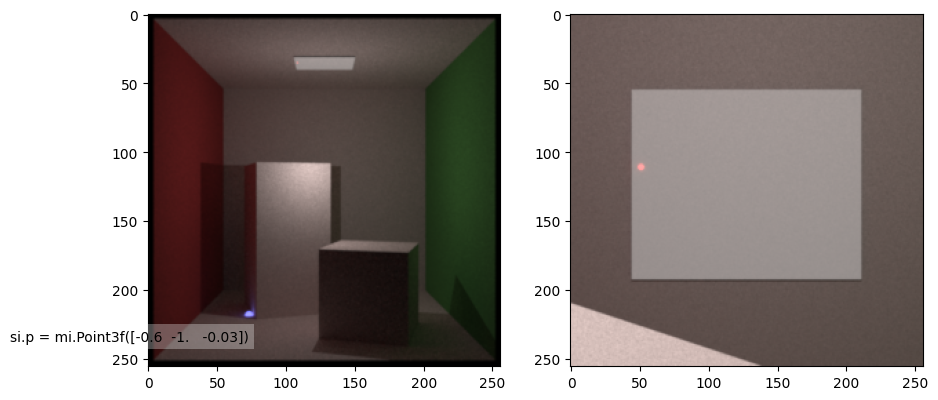

In [7]:
ray3 = mi.Ray3f([-0.6, 0.8, -0.03], [0, -1, 0])
si3 = scene.ray_intersect(ray3)
sampler.seed(0)
# Try to toggle `test_visibility`
ds3, weight3 = scene.sample_emitter_direction(si3, sampler.next_2d(), test_visibility=False)

plt.figure(figsize=(10,5))
show_ds(si3, [ds3])
print(ds3)
print(f"{weight3 = }")